<a href="https://colab.research.google.com/github/SaniyaBubere/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**   -**Credit Card Default Prediction** 



##### **Project Type**    - Classification Supervised
##### **Contribution**    - Team
##### **Team Member 1 - Saniya Bubere**
##### **Team Member 2 -Rahul Jadhav**
##### **Team Member 3 -Rupali Dawkore**


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The problem statement for credit card default prediction is to develop a model that accurately predicts the likelihood of a credit card holder defaulting on their debt payment in the near future. The model should take into account various factors such as the cardholder's credit history and other relevant financial information. The goal is to minimize false negatives (predicting a non-default when the cardholder actually defaults) and false positives (predicting a default when the cardholder is able to repay their debt) while maximizing the overall accuracy of the prediction.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for 

one month, 2=payment delay for two months,8=payment delay for eight months,

 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

### Import Libraries

In [1344]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler 

### Dataset Loading

In [1345]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1346]:
# #loading Dataset
# df=pd.read_excel("/content/drive/MyDrive/CAPSTONE PROJECT 3/default of credit card clients.xls")
df = pd.read_excel("/content/drive/MyDrive/default of credit card clients.xls", skiprows=[0], header=None)

### Dataset First View

In [1347]:
# Dataset First Look
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


### Dataset Rows & Columns count

In [1348]:
# Get the number of rows and columns
rows, columns = df.shape

In [1349]:
# Print the number of rows and columns
print("Number of rows: ", rows)
print("Number of columns: ", columns)

Number of rows:  30001
Number of columns:  25


We have 30001 rows and 25 columns

### Dataset Information

In [1350]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       30001 non-null  object
 1   1       30001 non-null  object
 2   2       30001 non-null  object
 3   3       30001 non-null  object
 4   4       30001 non-null  object
 5   5       30001 non-null  object
 6   6       30001 non-null  object
 7   7       30001 non-null  object
 8   8       30001 non-null  object
 9   9       30001 non-null  object
 10  10      30001 non-null  object
 11  11      30001 non-null  object
 12  12      30001 non-null  object
 13  13      30001 non-null  object
 14  14      30001 non-null  object
 15  15      30001 non-null  object
 16  16      30001 non-null  object
 17  17      30001 non-null  object
 18  18      30001 non-null  object
 19  19      30001 non-null  object
 20  20      30001 non-null  object
 21  21      30001 non-null  object
 22  22      30001 non-null

All the columns are in Object Dtype

#### Duplicate Values

In [1351]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24


No Duplicates Found

### What did you know about your dataset?

The data provided is a sample of a credit card default dataset. The first row provides the header information, with each column indicating a feature of the credit card holder. The first column (ID) is the unique identifier for each record. The second column (LIMIT_BAL) indicates the credit limit of the credit card. The third column (SEX) indicates the gender of the cardholder. The fourth column (EDUCATION) indicates the level of education of the cardholder. The fifth column (MARRIAGE) indicates the marital status of the cardholder. The sixth column (AGE) indicates the age of the cardholder. The seventh to sixteenth columns (PAY_0 to PAY_9) indicate the repayment status for the last ten months. The remaining columns (BILL_AMT1 to BILL_AMT6, PAY_AMT1 to PAY_AMT6) indicate the amount of bill statement and amount paid in the last six months. The final column (default payment next month) is the target variable and indicates whether the cardholder defaulted on their payment in the next month (1) or not (0).

## ***2. Understanding Your Variables***

In [1352]:
# Dataset Columns
df.rename(columns=df.iloc[0]).drop(df.index[0],inplace=True)


Removing Header of the Dataset as its not use full 

In [1353]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24],
           dtype='int64')

In [1354]:

# Set the second row as the header
df.columns = df.iloc[0]

In [1355]:

# Drop the second row (previous header row)
df = df.drop(df.index[0])

In [1356]:

# Reset the index
df = df.reset_index(drop=True)

In [1357]:
#Columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [1358]:
# Dataset Describe
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [1359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

### Variables Description 

ID: A unique identifier for each credit card holder.

LIMIT_BAL: The credit limit assigned to each card holder.

SEX: The gender of the card holder, encoded as 1 for male and 2 for female.

EDUCATION: The education level of the card holder, encoded as 1 for graduate school, 2 for university, 3 for high school, 4 for others, and 5 for unknown.

MARRIAGE: The marital status of the card holder, encoded as 0 for unknown, 1 for married, 2 for single, and 3 for others.

AGE: The age of the card holder.

PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, and PAY_6: The payment status in September, August, July, June, May, and April (respectively) of the year prior to the data collection, encoded as -1 for payment duly received, 1 for payment delay for one month, 2 for payment delay for two months, and so on.

BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, and BILL_AMT6: The amount of bill statement in September, August, July, June, May, and April (respectively) of the year prior to the data collection.

PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, and PAY_AMT6: The amount of payment in September, August, July, June, May, and April (respectively) of the year prior to the data collection.

default payment next month: A binary variable indicating whether the card holder defaulted on their payment in the next month, encoded as 1 for default and 0 for not default.

& There is No null Value in Dataset


### Check Unique Values for each variable.

In [1360]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [1361]:
def get_all_unique_values(df):
    for col in df.columns:
        print(f"Unique values in column '{col}':")
        print(df[col].unique())
        print()

In [1362]:
# Get and print all unique values
get_all_unique_values(df)

Unique values in column 'ID':
[1 2 3 ... 29998 29999 30000]

Unique values in column 'LIMIT_BAL':
[20000 120000 90000 50000 500000 100000 140000 200000 260000 630000 70000
 250000 320000 360000 180000 130000 450000 60000 230000 160000 280000
 10000 40000 210000 150000 380000 310000 400000 80000 290000 340000 300000
 30000 240000 470000 480000 350000 330000 110000 420000 170000 370000
 270000 220000 190000 510000 460000 440000 410000 490000 390000 580000
 600000 620000 610000 700000 670000 680000 430000 550000 540000 1000000
 530000 710000 560000 520000 750000 640000 16000 570000 590000 660000
 720000 327680 740000 800000 760000 690000 650000 780000 730000]

Unique values in column 'SEX':
[2 1]

Unique values in column 'EDUCATION':
[2 1 3 5 4 6 0]

Unique values in column 'MARRIAGE':
[1 2 3 0]

Unique values in column 'AGE':
[24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68

## 3. ***Data Wrangling***

### Data Wrangling Code

Some of the columns didn’t make sense to me, so I decided to rename them into more understandable terms.

In [1363]:
from termcolor import colored

In [1364]:
# renaming status,bill amount & payment amount columns
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'
,'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'
,'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

print(colored("\nTHE NAMES OF COLUMNS WERE SUCCESFULLY CHANGED...", color = "green", attrs = ["bold", "dark"]))


THE NAMES OF COLUMNS WERE SUCCESFULLY CHANGED...


In [1365]:
# renamin target column
df.rename(columns={'default payment next month':'default'},inplace=True)

In [1366]:
# after renamed look of dataset
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [1367]:
#Rearranging the columns
df=df.loc[:,['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_APR','PAY_MAY','PAY_JUN', 'PAY_JUL','PAY_AUG','PAY_SEPT','BILL_AMT_APR','BILL_AMT_MAY','BILL_AMT_JUN','BILL_AMT_JUL','BILL_AMT_AUG','BILL_AMT_SEPT','PAY_AMT_APR','PAY_AMT_MAY','PAY_AMT_JUN','PAY_AMT_JUL','PAY_AMT_AUG','PAY_AMT_SEPT','default']]

In [1368]:
# Looking for each rearranged columns
df[['PAY_APR','PAY_MAY','PAY_JUN', 'PAY_JUL','PAY_AUG','PAY_SEPT','BILL_AMT_APR','BILL_AMT_MAY','BILL_AMT_JUN','BILL_AMT_JUL','BILL_AMT_AUG','BILL_AMT_SEPT','PAY_AMT_APR','PAY_AMT_MAY','PAY_AMT_JUN','PAY_AMT_JUL','PAY_AMT_AUG','PAY_AMT_SEPT','default']]

,PAY_APR,PAY_MAY,PAY_JUN,PAY_JUL,PAY_AUG,PAY_SEPT,BILL_AMT_APR,BILL_AMT_MAY,BILL_AMT_JUN,BILL_AMT_JUL,BILL_AMT_AUG,BILL_AMT_SEPT,PAY_AMT_APR,PAY_AMT_MAY,PAY_AMT_JUN,PAY_AMT_JUL,PAY_AMT_AUG,PAY_AMT_SEPT,default
0,-2,-2,-1,-1,2,2,0,0,0,689,3102,3913,0,0,0,0,689,0,1
1,2,0,0,0,2,-1,3261,3455,3272,2682,1725,2682,2000,0,1000,1000,1000,0,1
2,0,0,0,0,0,0,15549,14948,14331,13559,14027,29239,5000,1000,1000,1000,1500,1518,0
3,0,0,0,0,0,0,29547,28959,28314,49291,48233,46990,1000,1069,1100,1200,2019,2000,0
4,0,0,0,-1,0,-1,19131,19146,20940,35835,5670,8617,679,689,9000,10000,36681,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,15980,31237,88004,208365,192815,188948,1000,5000,3047,5003,20000,8500,0
29996,0,0,-1,-1,-1,-1,0,5190,8979,3502,1828,1683,0,0,129,8998,3526,1837,0
29997,0,0,-1,2,3,4,19357,20582,20878,2758,3356,3565,3100,2000,4200,22000,0,0,1
29998,-1,0,0,0,-1,1,48944,11855,52774,76304,78379,-1645,1804,52964,1926,1178,3409,85900,1


Grouped unknown EDUCATION categories (0,5,6) and re-assigned them to 4 (others)


In [1369]:
#Replacing the value that is unknown to others category
df["EDUCATION"].replace({0:4,5:4,6:4},inplace=True)

In [1370]:
#looking for changes
df.EDUCATION.unique()

array([2, 1, 3, 4])

Grouped unknown MARRIAGE categories (0) and re-assigned them to 3 (others)

In [1371]:
#Replacing the value that is unknown to others category

df["MARRIAGE"].replace({0:3},inplace=True)

In [1372]:
#looking for changes
df.MARRIAGE.unique()

array([1, 2, 3])

# converting all columns to int data type


In [1373]:
#converting all columns to int data type
df = df.apply(pd.to_numeric, errors='coerce')

The pd.to_numeric method is applied to each column using the apply method

In [1374]:
#checking changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ID             30000 non-null  int64
 1   LIMIT_BAL      30000 non-null  int64
 2   SEX            30000 non-null  int64
 3   EDUCATION      30000 non-null  int64
 4   MARRIAGE       30000 non-null  int64
 5   AGE            30000 non-null  int64
 6   PAY_APR        30000 non-null  int64
 7   PAY_MAY        30000 non-null  int64
 8   PAY_JUN        30000 non-null  int64
 9   PAY_JUL        30000 non-null  int64
 10  PAY_AUG        30000 non-null  int64
 11  PAY_SEPT       30000 non-null  int64
 12  BILL_AMT_APR   30000 non-null  int64
 13  BILL_AMT_MAY   30000 non-null  int64
 14  BILL_AMT_JUN   30000 non-null  int64
 15  BILL_AMT_JUL   30000 non-null  int64
 16  BILL_AMT_AUG   30000 non-null  int64
 17  BILL_AMT_SEPT  30000 non-null  int64
 18  PAY_AMT_APR    30000 non-null  int64
 19  PAY_

### What all manipulations have you done and insights you found?
I have Changed the Name of a columns with its meaningfull name 

Grouped unknown EDUCATIONcategories (0,5,6) and re-assigned them to 4 (others)

Grouped unknown MARRIAGEcategories (0) and re-assigned them to 3 (others)

The pd.to_numeric method is applied to each column using the apply method to change the data type of columns to int



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **UNIVARIANT ANALYSIS**

In [1375]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_APR',
       'PAY_MAY', 'PAY_JUN', 'PAY_JUL', 'PAY_AUG', 'PAY_SEPT', 'BILL_AMT_APR',
       'BILL_AMT_MAY', 'BILL_AMT_JUN', 'BILL_AMT_JUL', 'BILL_AMT_AUG',
       'BILL_AMT_SEPT', 'PAY_AMT_APR', 'PAY_AMT_MAY', 'PAY_AMT_JUN',
       'PAY_AMT_JUL', 'PAY_AMT_AUG', 'PAY_AMT_SEPT', 'default'],
      dtype='object', name=0)

# **Distribution of Target column on the basis of Percentage**

In [1376]:
# x=(df["default"])
# percentage = lambda i: len(i) / float(len(x)) * 100

# ax = sns.barplot(x=x, y=x,  estimator=percentage)
# ax.set(ylabel="Percent")
# plt.show()

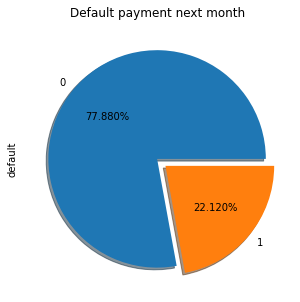

In [1377]:
plt.figure(figsize = [10, 5])
plt.title("Default payment next month")
df["default"].value_counts().plot.pie(explode = [0, 0.10], autopct = '%1.3f%%', shadow = True)

##### 1. Why did you pick the specific chart?

Bar charts are typically used to compare the values of categorical data and show the distribution of data over time. They are good for visualizing data for a small number of categories and allow for easy comparison of values.

##### 2. What is/are the insight(s) found from the chart?

We can say that Number of not default cardholders have higher % then Defaulters

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This is the positive impact that less number of cardholders are defaulters

# **Age Group Distribution**

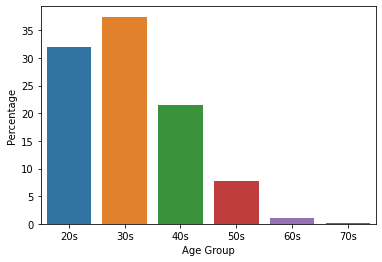

In [1378]:
ages=(df['AGE'])
bins = [20, 30, 40, 50, 60, 70, 80]
group_names = ['20s', '30s', '40s', '50s', '60s', '70s']

ages_df = pd.DataFrame({'ages': ages})
ages_df['age_group'] = pd.cut(ages_df['ages'], bins, labels=group_names, right=False)

age_group_counts = ages_df['age_group'].value_counts()

total_count = len(ages)
percentage = (age_group_counts / total_count) * 100

sns.barplot(x=age_group_counts.index, y=percentage)
plt.ylabel('Percentage')
plt.xlabel('Age Group')
plt.show()


This is a bar plot of the age groups of individuals who possess credit cards. The x-axis represents the age groups, and the y-axis represents the percentage of individuals in each age group who possess credit cards.

##### 1. Why did you pick the specific chart?

This is a bar plot of the age groups of individuals who possess credit cards. The x-axis represents the age groups, and the y-axis represents the percentage of individuals in each age group who possess credit cards.

##### 2. What is/are the insight(s) found from the chart?

Most of the People who are in the age group 30's have higher % of using Credit Card and 70's group have minimum cardholders

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

this say that most of the people who's age is between 20-30 are using credit card 

# **BIVARIATE**

# **Categorical Columns Insights**

In [1379]:
#Creating new Dataframe for categorical variables
df_cat = df[['SEX', 'EDUCATION', 'MARRIAGE']].copy()
df_cat['default'] = df['default']

#replace all values in categorical varibles with original names
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 
                'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4: 'others'}, 
                'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)


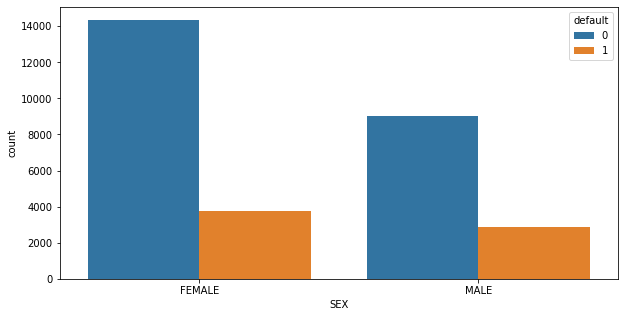

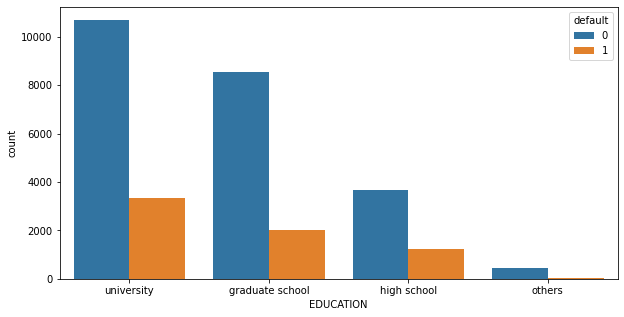

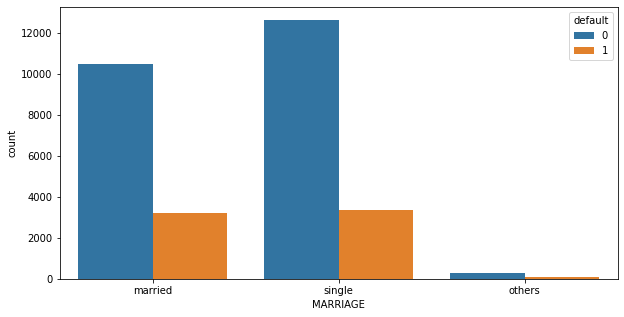

In [1380]:
# printing the categorical feature value counts
for col in ['SEX', 'EDUCATION', 'MARRIAGE']:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'default', data = df_cat)

##### 1. Why did you pick the specific chart?

Bar charts are typically used to compare the values of categorical data and show the distribution of data over time. They are good for visualizing data for a small number of categories and allow for easy comparison of values.

##### 2. What is/are the insight(s) found from the chart?

1: From the 1st chart we can observe that female are more cardholders then male
And surprisingly they are more defaulter then male 

2: From education chart we can say that the person who have higher education have higher default count then others

3: From last chart we can observe that singles & married both have same count for default

##### 3. Will the gained insights help creating a positive business impact? 

1: From this we get to know that we can give more credit card to Males as they are less defaulters then females


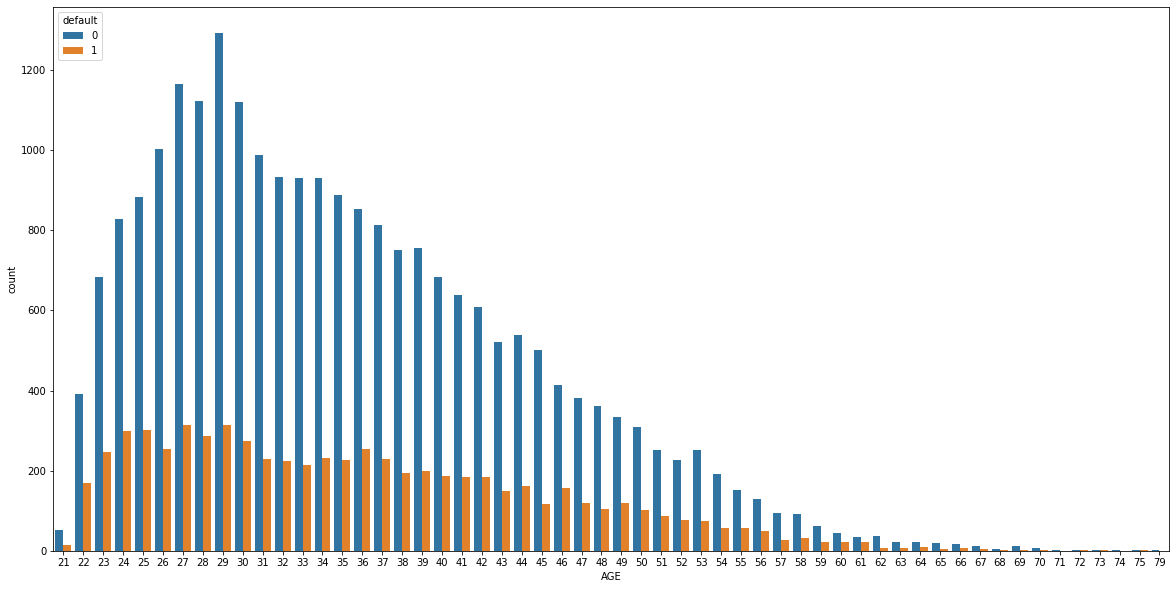

In [1381]:
#Age VS default
plt.figure(figsize=(20,10))
sns.countplot(x='AGE',hue='default',data=df);

##### 1. Why did you pick the specific chart?

Bar Chart allows for a quick visual comparison of the data.

##### 2. What is/are the insight(s) found from the chart?

Age between 24 to 30 are more defaulters 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can observe that Age between 24 to 30 have more defaulter and most of the Cardholders are not defaulters

Defaulters with respect to Pay_Sept

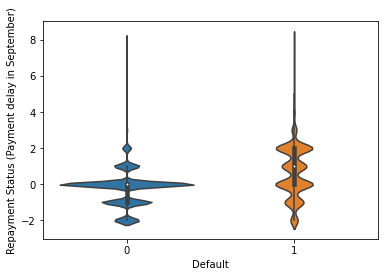

In [1382]:
sns.violinplot(x='default', y='PAY_SEPT', data=df)
plt.xlabel('Default')
plt.ylabel('Repayment Status (Payment delay in September)')
plt.show()


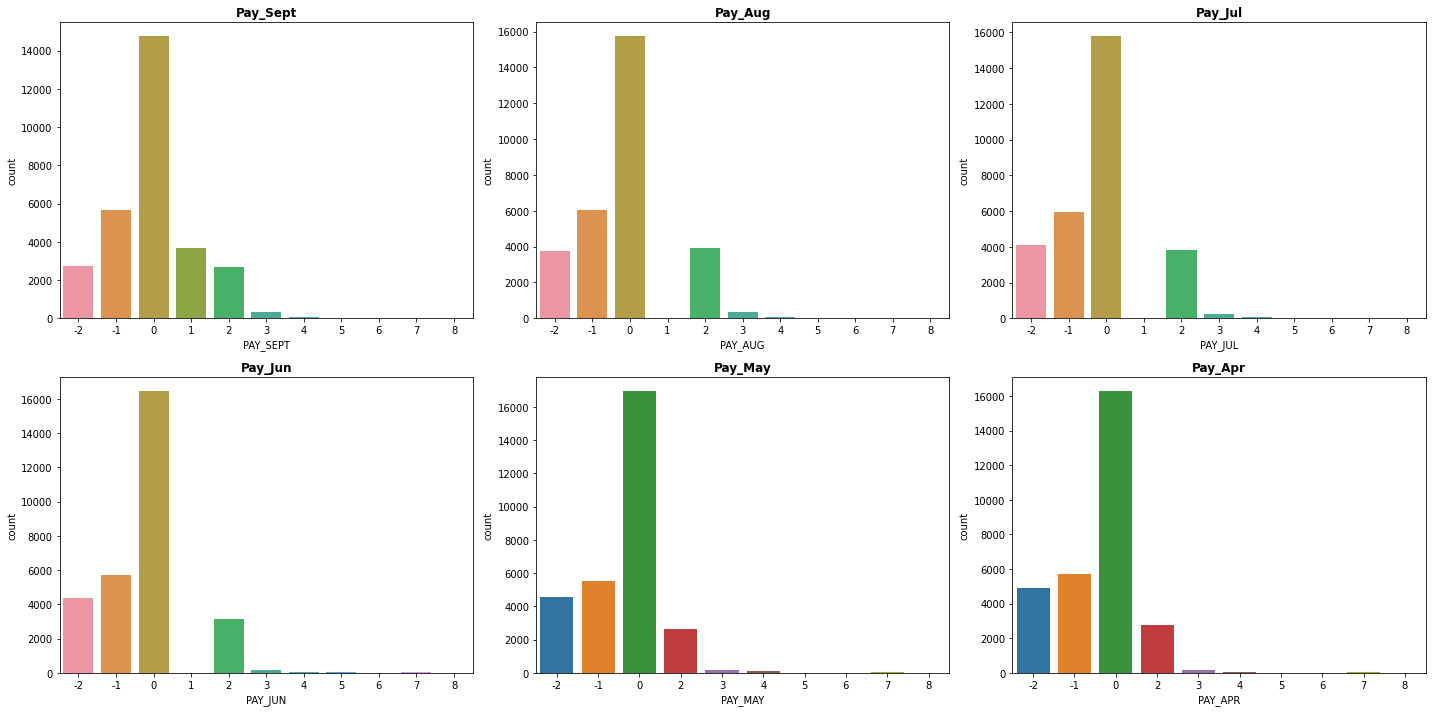

In [1383]:
plt.figure(figsize=(20,10))
#Plotting payment staus using countplot
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for num,column in enumerate(pay_col):
  plt.subplot(2,3,num+1)
  sns.countplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

# **MULTIVARIANT**

In [1384]:
#Creating new variables
var = df[['SEX', 'LIMIT_BAL','AGE']].copy()
var['default'] = df['default']

#replace values in varibles with original names
var.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}},inplace = True)

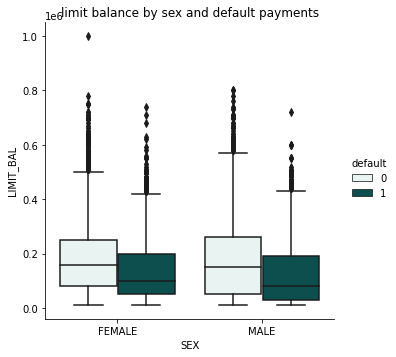

In [1385]:
#taking catplot for the given variable
sns.catplot(x = "SEX",
            y = "LIMIT_BAL",
            kind = "box",
            hue = "default",
            color = '#0c4f4e',
            data = var, saturation = 2,
            margin_titles = True).set(title = "limit balance by sex and default payments");

##### 1. Why did you pick the specific chart?

Catplot is used in Seaborn to create categorical plots, which are plots that show the relationship between a categorical variable i.e SEX and one continuous variables i.e LIMIT_BAL. These plots are useful for visualizing the distribution and spread of data.

##### 2. What is/are the insight(s) found from the chart?

There are more Female defaulters than men ,female have more ouliers in Limit Balance Variable

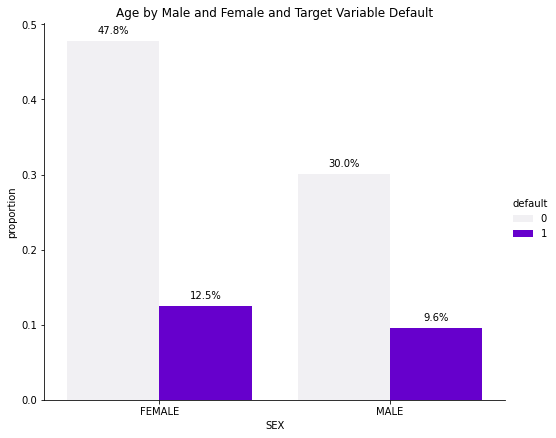

In [1386]:
# Calculate the proportions for each bar
prop_df = var.groupby(["SEX", "default"])["AGE"].count() / len(var)
prop_df = prop_df.reset_index()
prop_df = prop_df.rename(columns={"AGE": "proportion"})

# Plot the bar chart
g = sns.catplot(x="SEX", y="proportion", hue="default", kind="bar", color="#6600CC",
                data=prop_df, height=6, aspect=1.2, saturation=1)

# Add the percentage labels to the bars
for ax in g.axes.flatten():
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2,
                height + 0.01,
                '{:.1%}'.format(height),
                ha="center")

g.set(title = "Age by Male and Female and Target Variable Default")
plt.show()


##### 1. Why did you pick the specific chart?

Double bar charts are used to compare the distribution of a target variable across different categories. They can provide a clear and concise way to visualize the differences and similarities between the categories, making it easy to identify trends and patterns.

##### 2. What is/are the insight(s) found from the chart?

we first calculate the proportions for each bar by grouping the data by SEX and default and then dividing the count of values in each group by the total number of values in the data. We then plot the bar chart using catplot as before, but this time using the proportions instead of the raw count.

#### Chart - 9

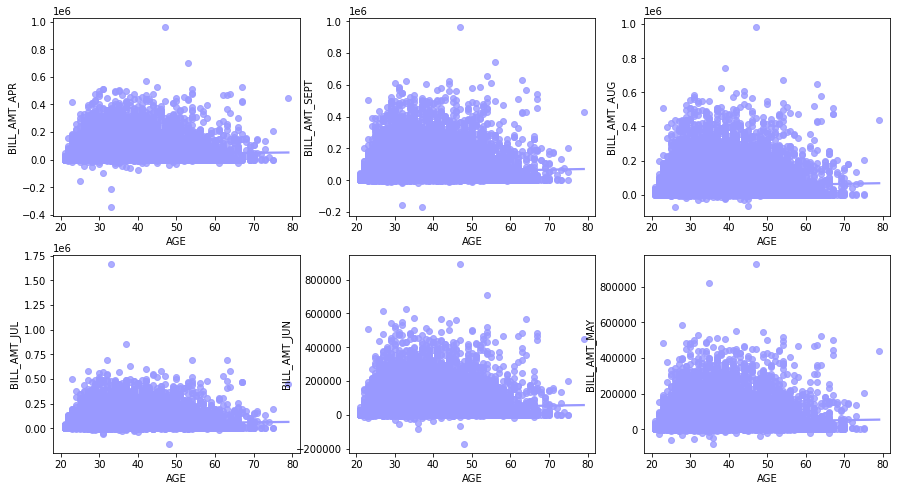

In [1387]:
fig, axes = plt.subplots(2, 3, figsize = (15, 8))
axes = axes.flatten()

sns.regplot(ax = axes[0], x = "AGE", y = "BILL_AMT_APR", data = df, color = "#9999FF");
sns.regplot(ax = axes[1], x = "AGE", y = "BILL_AMT_SEPT", data = df, color = "#9999FF");
sns.regplot(ax = axes[2], x = "AGE", y = "BILL_AMT_AUG", data = df, color = "#9999FF");
sns.regplot(ax = axes[3], x = "AGE", y = "BILL_AMT_JUL", data = df, color = "#9999FF");
sns.regplot(ax = axes[4], x = "AGE", y = "BILL_AMT_JUN", data = df, color = "#9999FF");
sns.regplot(ax = axes[5], x = "AGE", y = "BILL_AMT_MAY", data = df, color = "#9999FF");


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

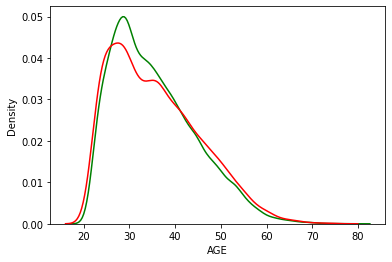

In [1388]:
# Chart - 10 visualization code
sns.distplot(df[df["default"]==0]["AGE"],hist=False,color='green')
sns.distplot(df[df['default']==1]["AGE"],hist=False,color='red')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [1389]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [1390]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

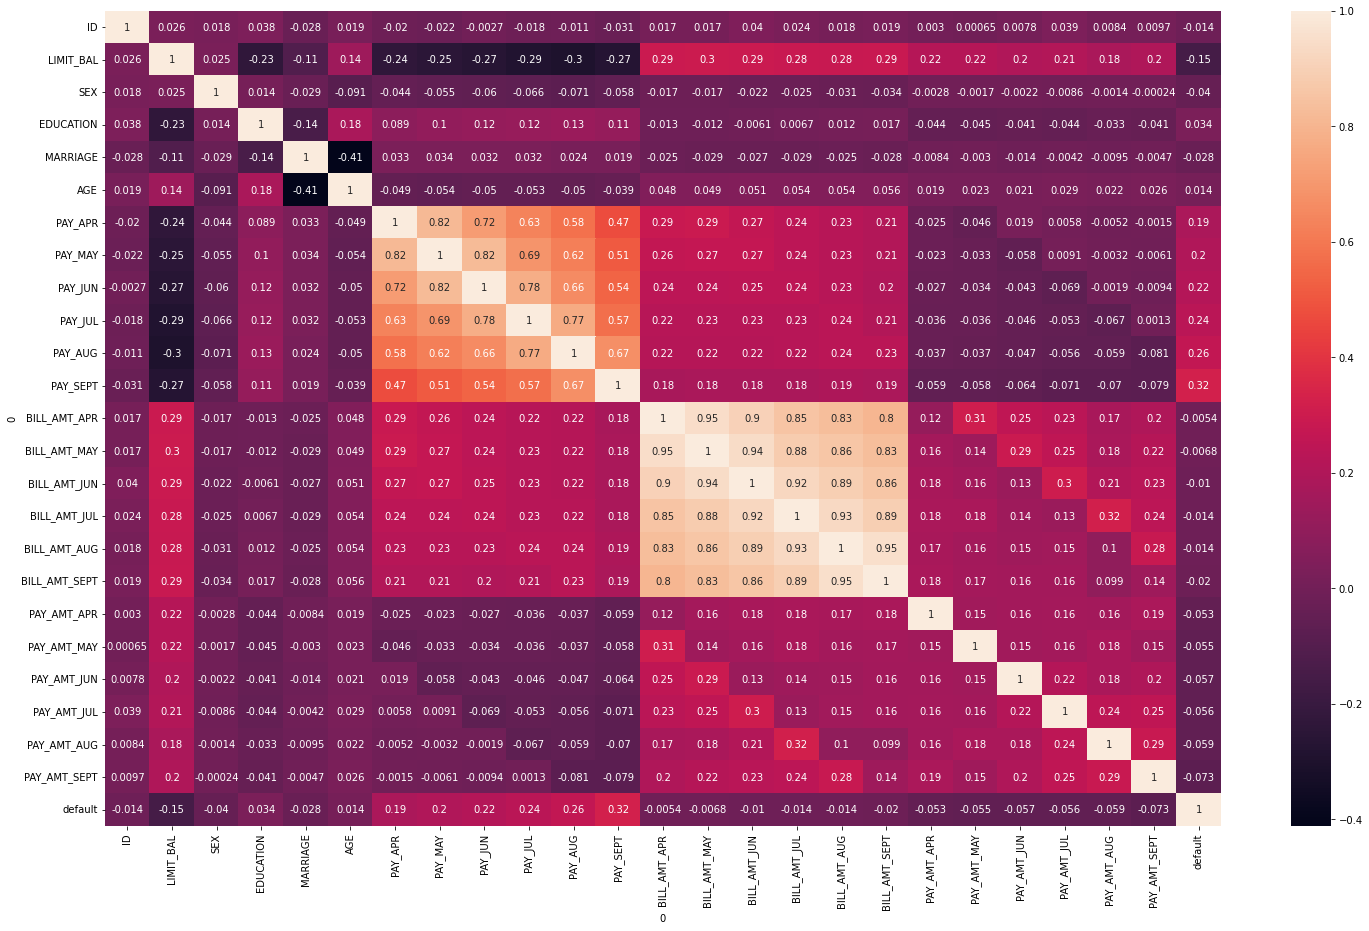

In [1391]:
plt.figure(figsize = [25, 15])
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [1392]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next two questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.


1- Null Hypothesis - There is no relation between Categorical Variables and Default

Alternate Hypothesis - There is a relationship between Categorical Variables and Default

2- Null Hypothesis - There is no relation between Numeric Variable and Default

Alternate Hypothesis - There is a relation between Numeric Variable and Default


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1- Null Hypothesis - There is no relation between Categorical Variables and Default

Alternate Hypothesis - There is a relationship between Categorical Variables and Default

#### 2. Perform an appropriate statistical test.

In [1393]:
from scipy.stats import chi2_contingency

def hypothesis_test_chi2(df, categorical_variable, alpha=0.05):
    # Split the data into default and non-default groups
    default = df[df['default'] == 1]
    non_default = df[df['default'] == 0]

    # Conduct a chi-square test for the independence of the categorical variable and default
    cont = pd.crosstab(df['default'], df[categorical_variable])
    chi2, p_value, dof, expected = chi2_contingency(cont)

    # Make a decision based on the p-value and alpha
    if p_value < alpha:
        return f"Reject the null hypothesis. There is a significant association between {categorical_variable} and default."
    else:
        return f"Fail to reject the null hypothesis. There is no significant association between {categorical_variable} and default."


In [1394]:
# Define a list of categorical variables
categorical = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
# Loop through the list of categorical variables
for categorical_variable in categorical:
    result = hypothesis_test_chi2(df, categorical_variable)
    print(result)

Reject the null hypothesis. There is a significant association between SEX and default.
Reject the null hypothesis. There is a significant association between EDUCATION and default.
Reject the null hypothesis. There is a significant association between MARRIAGE and default.
Reject the null hypothesis. There is a significant association between PAY_SEPT and default.
Reject the null hypothesis. There is a significant association between PAY_AUG and default.
Reject the null hypothesis. There is a significant association between PAY_JUL and default.
Reject the null hypothesis. There is a significant association between PAY_JUN and default.
Reject the null hypothesis. There is a significant association between PAY_MAY and default.
Reject the null hypothesis. There is a significant association between PAY_APR and default.


##### Which statistical test have you done to obtain P-Value?

The function hypothesis_test_chi2 performs a chi-square test for independence to obtain the p-value. The chi2_contingency function from the scipy.stats library is used to calculate the chi-square statistic and the p-value.

##### Why did you choose the specific statistical test?

The chi-square test for independence is a common test for determining if there is a significant association between two categorical variables. In this case, the categorical variable of interest and the binary outcome variable "default" are being tested for independence. The choice of the chi-square test for independence is appropriate for this type of analysis.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


2- Null Hypothesis - There is no relation between Numeric Variable and Default

Alternate Hypothesis - There is a relation between Numeric Variable and Default

#### 2. Perform an appropriate statistical test.

In [1395]:
from scipy.stats import ttest_ind

def hypothesis_test_t(df, numerical_variable, alpha=0.05):
    # Split the data into default and non-default groups
    default = df[df['default'] == 1][numerical_variable]
    non_default = df[df['default'] == 0][numerical_variable]

    # Conduct a two-sample t-test for the means of the numerical variable for default and non-default groups
    t, p_value = ttest_ind(default, non_default)

    # Make a decision based on the p-value and alpha
    if p_value < alpha:
        return f"Reject the null hypothesis. There is a significant difference in the means of {numerical_variable} between default and non-default groups."
    else:
        return f"Fail to reject the null hypothesis. There is no significant difference in the means of {numerical_variable} between default and non-default groups."


In [1396]:
numerical_columns = ['LIMIT_BAL','AGE','BILL_AMT_APR','BILL_AMT_MAY', 'BILL_AMT_JUN', 'BILL_AMT_JUL', 'BILL_AMT_AUG','BILL_AMT_SEPT', 'PAY_AMT_APR', 'PAY_AMT_MAY', 'PAY_AMT_JUN',       'PAY_AMT_JUL', 'PAY_AMT_AUG', 'PAY_AMT_SEPT']

for col in numerical_columns:
    result = hypothesis_test_t(df, col, alpha=0.05)
    print(result)


Reject the null hypothesis. There is a significant difference in the means of LIMIT_BAL between default and non-default groups.
Reject the null hypothesis. There is a significant difference in the means of AGE between default and non-default groups.
Fail to reject the null hypothesis. There is no significant difference in the means of BILL_AMT_APR between default and non-default groups.
Fail to reject the null hypothesis. There is no significant difference in the means of BILL_AMT_MAY between default and non-default groups.
Fail to reject the null hypothesis. There is no significant difference in the means of BILL_AMT_JUN between default and non-default groups.
Reject the null hypothesis. There is a significant difference in the means of BILL_AMT_JUL between default and non-default groups.
Reject the null hypothesis. There is a significant difference in the means of BILL_AMT_AUG between default and non-default groups.
Reject the null hypothesis. There is a significant difference in the

##### Which statistical test have you done to obtain P-Value?

The function hypothesis_test_t performs a two-sample t-test to obtain the p-value. The ttest_ind function from the scipy.stats library is used to calculate the t-statistic and the p-value

##### Why did you choose the specific statistical test?

The two-sample t-test is a common test for determining if there is a significant difference in means between two groups. In this case, the two groups are the default and non-default groups for a numerical variable. The choice of the two-sample t-test is appropriate for this type of analysis when the numerical variable is continuous and the sample size is relatively small.

## ***6. Feature Engineering & Data Pre-processing***

In [1397]:
# Copy of orignal dataset
df_copy=df.copy()
#To delete the column Name ID
df_copy.drop('ID', axis=1, inplace=True) 

### 1. Handling Missing Values

In [1398]:
# Looking for null value by using .info
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   LIMIT_BAL      30000 non-null  int64
 1   SEX            30000 non-null  int64
 2   EDUCATION      30000 non-null  int64
 3   MARRIAGE       30000 non-null  int64
 4   AGE            30000 non-null  int64
 5   PAY_APR        30000 non-null  int64
 6   PAY_MAY        30000 non-null  int64
 7   PAY_JUN        30000 non-null  int64
 8   PAY_JUL        30000 non-null  int64
 9   PAY_AUG        30000 non-null  int64
 10  PAY_SEPT       30000 non-null  int64
 11  BILL_AMT_APR   30000 non-null  int64
 12  BILL_AMT_MAY   30000 non-null  int64
 13  BILL_AMT_JUN   30000 non-null  int64
 14  BILL_AMT_JUL   30000 non-null  int64
 15  BILL_AMT_AUG   30000 non-null  int64
 16  BILL_AMT_SEPT  30000 non-null  int64
 17  PAY_AMT_APR    30000 non-null  int64
 18  PAY_AMT_MAY    30000 non-null  int64
 19  PAY_

There is no missing value in the given dataset

### 2. Handling Outliers

In [1399]:
# independant variable
Input_columns=[ 'LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE','AGE','PAY_APR',
       'PAY_MAY', 'PAY_JUN', 'PAY_JUL', 'PAY_AUG', 'PAY_SEPT', 'BILL_AMT_APR',
       'BILL_AMT_MAY', 'BILL_AMT_JUN', 'BILL_AMT_JUL', 'BILL_AMT_AUG',
       'BILL_AMT_SEPT', 'PAY_AMT_APR', 'PAY_AMT_MAY', 'PAY_AMT_JUN',
       'PAY_AMT_JUL', 'PAY_AMT_AUG', 'PAY_AMT_SEPT']
# dependent variable
Target_column=["default"]

In [1400]:
# numeric columns
numeric_cols=['LIMIT_BAL','AGE', 'BILL_AMT_APR',
       'BILL_AMT_MAY', 'BILL_AMT_JUN', 'BILL_AMT_JUL', 'BILL_AMT_AUG',
       'BILL_AMT_SEPT', 'PAY_AMT_APR', 'PAY_AMT_MAY', 'PAY_AMT_JUN',
       'PAY_AMT_JUL', 'PAY_AMT_AUG', 'PAY_AMT_SEPT']

#categorical columns
categorical_cols=['SEX', 'EDUCATION', 'MARRIAGE','PAY_APR',
       'PAY_MAY', 'PAY_JUN', 'PAY_JUL', 'PAY_AUG', 'PAY_SEPT' ]

In [1401]:
# Looking for Number of Ouliers in numeric column
print("Number of Outlier Records:")
for col in numeric_cols:
    upper = df_copy[col].quantile(0.75) + 1.5 * (df_copy[col].quantile(0.75) - df_copy[col].quantile(0.25))
    outliers = df_copy[df_copy[col] > upper][col].count()
    print("{}: {}".format(col, outliers))

Number of Outlier Records:
LIMIT_BAL: 167
AGE: 272
BILL_AMT_APR: 2688
BILL_AMT_MAY: 2724
BILL_AMT_JUN: 2620
BILL_AMT_JUL: 2468
BILL_AMT_AUG: 2395
BILL_AMT_SEPT: 2398
PAY_AMT_APR: 2958
PAY_AMT_MAY: 2945
PAY_AMT_JUN: 2994
PAY_AMT_JUL: 2598
PAY_AMT_AUG: 2714
PAY_AMT_SEPT: 2745


# Ouliers Detection

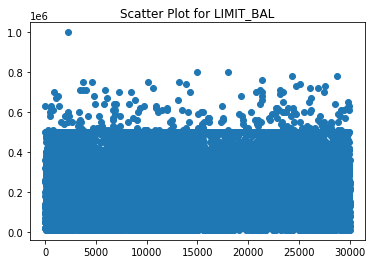

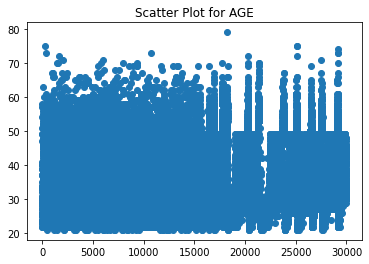

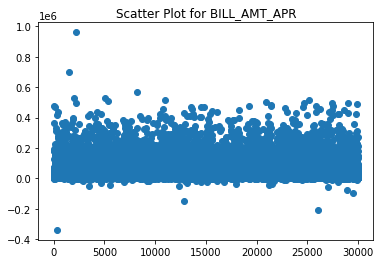

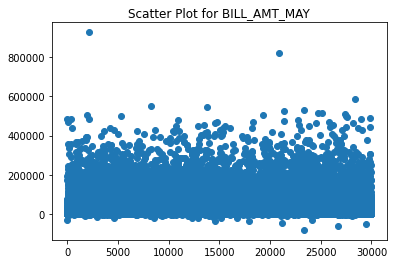

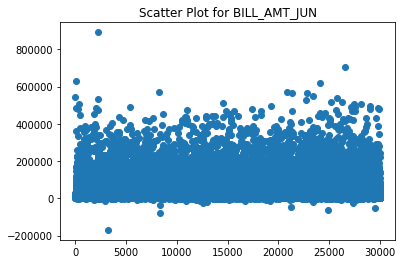

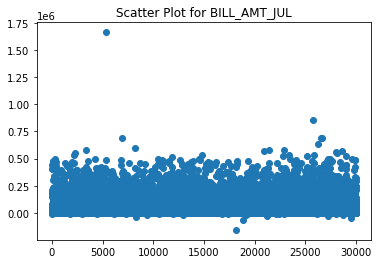

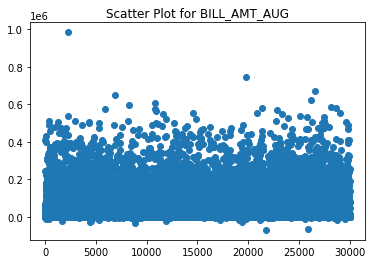

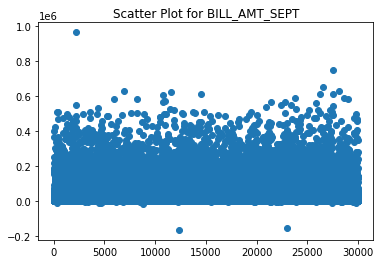

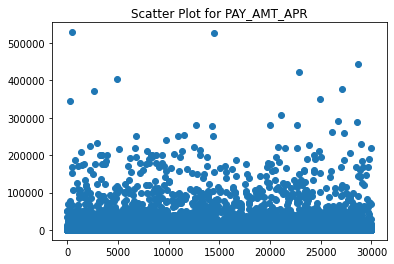

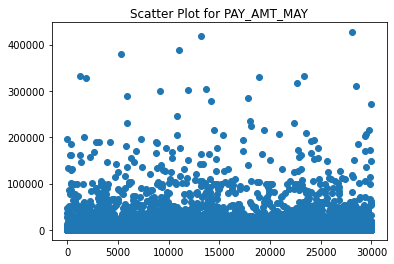

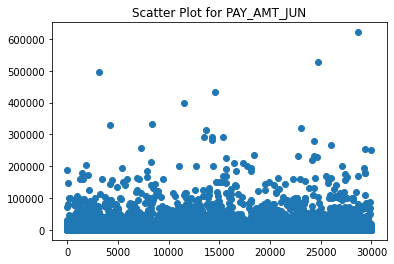

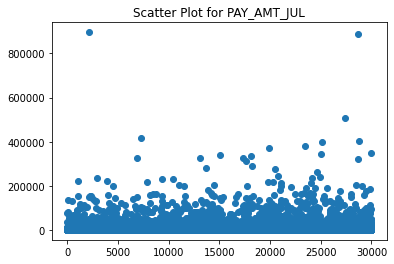

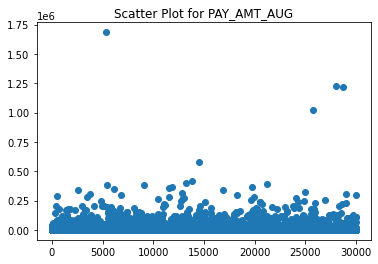

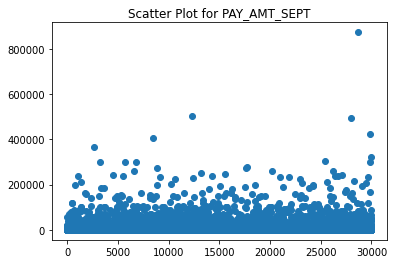

In [1402]:
# for loop for looking outliers of numeric columns using scatter plot
for col in numeric_cols:
    plt.scatter(range(len(df_copy[col])), df_copy[col])
    plt.title(f"Scatter Plot for {col}")
    plt.show()

# Capping

In [1403]:
#Capping Outlier using IQR method 
for col in numeric_cols:
    upper = df_copy[col].quantile(0.75) + 1.5 * (df_copy[col].quantile(0.75) - df_copy[col].quantile(0.25))
    df_copy[col] = np.where(df_copy[col] > upper, upper, df_copy[col])
    print("{}: {}".format(col, outliers))


LIMIT_BAL: 2745
AGE: 2745
BILL_AMT_APR: 2745
BILL_AMT_MAY: 2745
BILL_AMT_JUN: 2745
BILL_AMT_JUL: 2745
BILL_AMT_AUG: 2745
BILL_AMT_SEPT: 2745
PAY_AMT_APR: 2745
PAY_AMT_MAY: 2745
PAY_AMT_JUN: 2745
PAY_AMT_JUL: 2745
PAY_AMT_AUG: 2745
PAY_AMT_SEPT: 2745


 Box Plot of LIMIT_BAL


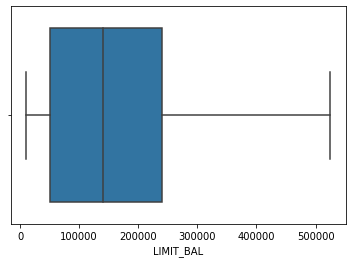

 Box Plot of AGE


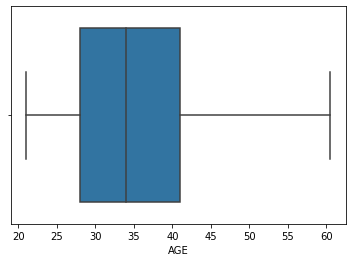

 Box Plot of BILL_AMT_APR


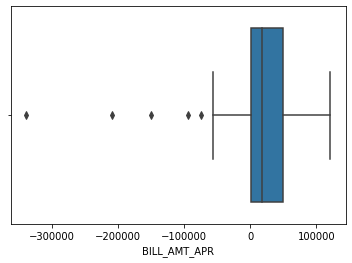

 Box Plot of BILL_AMT_MAY


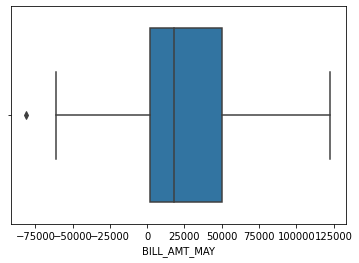

 Box Plot of BILL_AMT_JUN


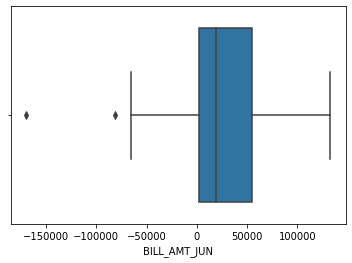

 Box Plot of BILL_AMT_JUL


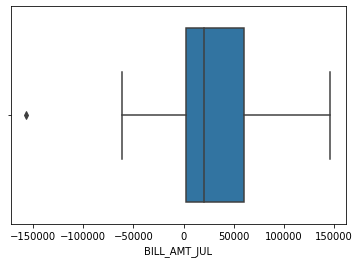

 Box Plot of BILL_AMT_AUG


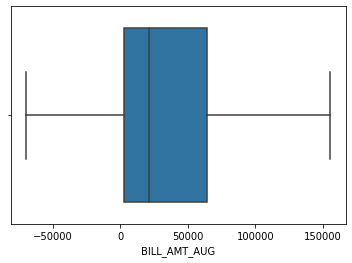

 Box Plot of BILL_AMT_SEPT


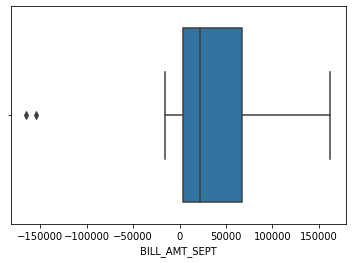

 Box Plot of PAY_AMT_APR


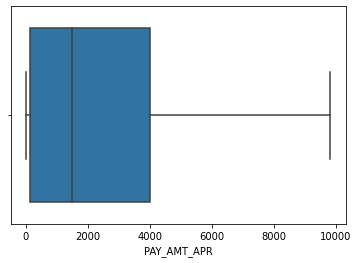

 Box Plot of PAY_AMT_MAY


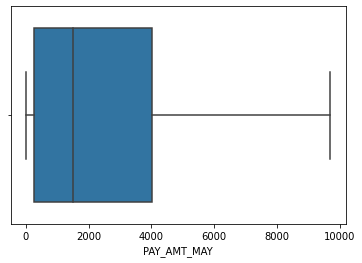

 Box Plot of PAY_AMT_JUN


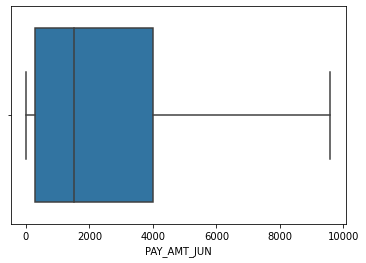

 Box Plot of PAY_AMT_JUL


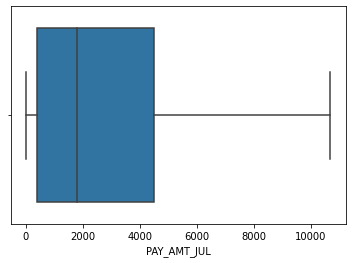

 Box Plot of PAY_AMT_AUG


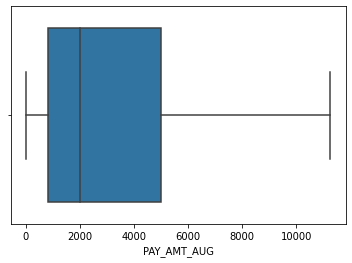

 Box Plot of PAY_AMT_SEPT


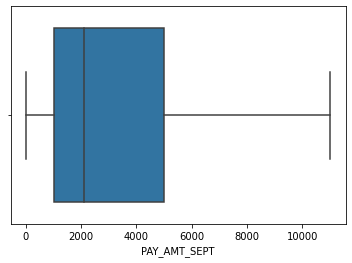

In [1404]:
#using boxplot to observe that after capping we elimated the ouliers or not
for col in numeric_cols:
    sns.boxplot(df_copy[col])
    print(' Box Plot of',col)
    plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [1405]:
# Manipulate Features to minimize feature correlation and create new features
def replace_values(df_copy, col, values):
    # This code is replacing all values of -2, -1, and 0 in the specified columns with 0.
    fil = (df_copy[col] == -2) | (df_copy[col] == -1) | (df_copy[col] == 0)
    df_copy.loc[fil, col] = values

columns = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
values = 0

for col in columns:
    replace_values(df_copy, col, values)

This code is replacing all values of -2, -1, and 0 in the specified columns with 0.

In [1406]:
def replace_values(df_copy, col, values):
    #  This code is replacing all values greater then 0 in the specified columns with 0.
    fil = (df_copy[col] < 0)
    df_copy.loc[fil, col] = values

columns = ['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']
values = 0

for col in columns:
    replace_values(df_copy, col, values)



As negative Bill Amount paid indicates that the person has paid his due payment already. Hence, we transform the data as above

#### 2. Feature Selection

In [1407]:
fil = (df_copy.PAY_SEPT == 0) & (df_copy.PAY_AUG == 0) & (df_copy.PAY_JUL == 0) & (df_copy.PAY_JUN == 0) & (df_copy.PAY_MAY == 0) & (df_copy.PAY_APR == 0) & (df_copy.default ==1)
df_copy.loc[fil,'default'] = 0

As customers who have not defaulted in any month cannot be potential defaulters hence, we have transformed the data as above.


In [1408]:
fil = (df_copy.PAY_SEPT> 0) & (df_copy.PAY_AUG > 0) & (df_copy.PAY_JUL > 0) & (df_copy.PAY_JUN > 0) & (df_copy.PAY_MAY > 0) & (df_copy.PAY_APR > 0) & (df_copy.default ==0)
df_copy.loc[fil,'default'] = 1

As customers who have defaulted in every month are the potential defaulters hence, we have transformed the data as above.

## Converting Age column in Categorical values 

In [1409]:
#converting Age column in Categorical values 
def categorize_age(age):
    # applying the categorize_age function to the AGE column of the dataframe,
    #  the original ages in the column are transformed into categorical values.
    if 21 <= age < 41:
        return 1
    elif 41 <= age < 61:
        return 2
    elif 61 <= age < 81:
        return 3

df_copy['AGE'] = df_copy['AGE'].apply(categorize_age)


the ages are into three categories, By applying the categorize_age function to the AGE column of the dataframe, the original ages in the column are transformed into categorical values.

# Binning

In [1410]:
# Binning categorical columns 'PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR'
def bins(x):
    # the 'bins' function is being applied, which maps the values to one of four categorical bins
    if x == -2:
        return '0'
    if x == 0:
        return '0'
    if x == -1:
        return '0'
    if x in range(1,4):
        return '1 to 3'
    if x in range(4,7):
        return '4 to 6'
    if x in range(7,9):
        return '7 to 9'

for i in df[['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']]:
    df_copy[i]=df_copy[i].apply(bins)

In [1411]:
df_copy.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_APR,PAY_MAY,PAY_JUN,PAY_JUL,PAY_AUG,...,BILL_AMT_JUL,BILL_AMT_AUG,BILL_AMT_SEPT,PAY_AMT_APR,PAY_AMT_MAY,PAY_AMT_JUN,PAY_AMT_JUL,PAY_AMT_AUG,PAY_AMT_SEPT,default
0,20000.0,2,2,1,1,0,0,0,0,1 to 3,...,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,1
1,120000.0,2,2,2,1,1 to 3,0,0,0,1 to 3,...,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,1
2,90000.0,2,2,2,1,0,0,0,0,0,...,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0
3,50000.0,2,2,1,1,0,0,0,0,0,...,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,0
4,50000.0,1,2,1,2,0,0,0,0,0,...,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,11250.5,2000.0,0


The values of the columns 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', and 'PAY_APR' in the DataFrame 'df_copy'.

For each value of these columns, the 'bins' function is being applied, which maps the values to one of four categorical bins:

Paid Duly (for values of -2, 0, or -1)

1 to 3 (for values in the range 1 to 3)

4 to 6 (for values in the range 4 to 6)

7 to 9 (for values in the range 7 to 9)

### 3. Categorical Encoding

# Label Encoding for Sex Column

In [1412]:
# replacing the gender 1 i.e male with 0 and 2 i.e female with 1
df_copy["SEX"].replace({1:0},inplace=True)
#looking for changes
df_copy.SEX.unique()

array([2, 0])

In [1413]:
df_copy["SEX"].replace({2:1},inplace=True)
#looking for changes
df_copy.SEX.unique()

array([1, 0])

In [1414]:
#categorical columns
categorical_cols_to_encode=['EDUCATION', 'MARRIAGE','PAY_APR',
       'PAY_MAY', 'PAY_JUN', 'PAY_JUL', 'PAY_AUG', 'PAY_SEPT' ]


# One Hot Encoding

In [1415]:
# Encoding categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(df_copy[categorical_cols_to_encode])
encoded_cols = list(encoder.get_feature_names(categorical_cols_to_encode))
df_copy[encoded_cols] = encoder.transform(df_copy[categorical_cols_to_encode])

In [1416]:
# checking encoded columns
encoded_cols

['EDUCATION_1',
 'EDUCATION_2',
 'EDUCATION_3',
 'EDUCATION_4',
 'MARRIAGE_1',
 'MARRIAGE_2',
 'MARRIAGE_3',
 'PAY_APR_0',
 'PAY_APR_1 to 3',
 'PAY_APR_4 to 6',
 'PAY_APR_7 to 9',
 'PAY_MAY_0',
 'PAY_MAY_1 to 3',
 'PAY_MAY_4 to 6',
 'PAY_MAY_7 to 9',
 'PAY_JUN_0',
 'PAY_JUN_1 to 3',
 'PAY_JUN_4 to 6',
 'PAY_JUN_7 to 9',
 'PAY_JUL_0',
 'PAY_JUL_1 to 3',
 'PAY_JUL_4 to 6',
 'PAY_JUL_7 to 9',
 'PAY_AUG_0',
 'PAY_AUG_1 to 3',
 'PAY_AUG_4 to 6',
 'PAY_AUG_7 to 9',
 'PAY_SEPT_0',
 'PAY_SEPT_1 to 3',
 'PAY_SEPT_4 to 6',
 'PAY_SEPT_7 to 9']

In [1417]:
# droping orignal columns
df_copy.drop(['EDUCATION','MARRIAGE','PAY_APR','PAY_MAY','PAY_JUN','PAY_JUL','PAY_AUG','PAY_SEPT'],axis=1,inplace=True)

In [1418]:
# looking for changes done after doing encoding
df_copy

,LIMIT_BAL,SEX,AGE,BILL_AMT_APR,BILL_AMT_MAY,BILL_AMT_JUN,BILL_AMT_JUL,BILL_AMT_AUG,BILL_AMT_SEPT,PAY_AMT_APR,...,PAY_JUL_4 to 6,PAY_JUL_7 to 9,PAY_AUG_0,PAY_AUG_1 to 3,PAY_AUG_4 to 6,PAY_AUG_7 to 9,PAY_SEPT_0,PAY_SEPT_1 to 3,PAY_SEPT_4 to 6,PAY_SEPT_7 to 9
0,20000.0,1,1,0.0,0.0,0.0,689.0,3102.0,3913.000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,120000.0,1,1,3261.0,3455.0,3272.0,2682.0,1725.0,2682.000,2000.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,90000.0,1,1,15549.0,14948.0,14331.0,13559.0,14027.0,29239.000,5000.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,50000.0,1,1,29547.0,28959.0,28314.0,49291.0,48233.0,46990.000,1000.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,50000.0,0,2,19131.0,19146.0,20940.0,35835.0,5670.0,8617.000,679.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,0,1,15980.0,31237.0,88004.0,146412.5,155538.5,162389.375,1000.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29996,150000.0,0,2,0.0,5190.0,8979.0,3502.0,1828.0,1683.000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29997,30000.0,0,1,19357.0,20582.0,20878.0,2758.0,3356.0,3565.000,3100.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,80000.0,0,2,48944.0,11855.0,52774.0,76304.0,78379.0,0.000,1804.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Binning and One Hot Encoding.

Binning because the values of the columns 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', and 'PAY_APR' For each value of these columns, the 'bins' function is being applied, which maps the values to one of four categorical bins:

Paid Duly (for values of -2, 0, or -1)

1 to 3 (for values in the range 1 to 3)

4 to 6 (for values in the range 4 to 6)

7 to 9 (for values in the range 7 to 9)

One Hot Encoding because 'EDUCATION','MARRIAGE','PAY_APR','PAY_MAY','PAY_JUN','PAY_JUL','PAY_AUG','PAY_SEPT' this all columns are categoricals so we have to change this in numerical columns.


###  Data Splitting

In [1419]:
# independent variable (estimator)
X = df_copy.drop("default", axis = 1)

# dependent variable (label)
y = df_copy["default"]

In [1420]:
# Split your data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle=True, stratify=y, random_state = 42)

##### What data splitting ratio have you used and why? 

Answer Here.

### Data Scaling

In [1421]:
# Scaling your data
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scale, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scale, columns = X_test.columns)

##### Which method have you used to scale you data and why?

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [1422]:
df_copy.default.value_counts() 

0    25300
1     4700
Name: default, dtype: int64

In [1425]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [1426]:
X_train_smote, y_train_smote = smote.fit_resample(X,y)
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 17710, 1: 3290})
After SMOTE : Counter({1: 25300, 0: 25300})


In [1428]:
print('Original dataset shape', len(df_copy))
print('Resampled dataset shape', len(y_train_smote))

Original dataset shape 30000
Resampled dataset shape 50600


In [1429]:
columns = list(df_copy.columns)
columns

['LIMIT_BAL',
 'SEX',
 'AGE',
 'BILL_AMT_APR',
 'BILL_AMT_MAY',
 'BILL_AMT_JUN',
 'BILL_AMT_JUL',
 'BILL_AMT_AUG',
 'BILL_AMT_SEPT',
 'PAY_AMT_APR',
 'PAY_AMT_MAY',
 'PAY_AMT_JUN',
 'PAY_AMT_JUL',
 'PAY_AMT_AUG',
 'PAY_AMT_SEPT',
 'default',
 'EDUCATION_1',
 'EDUCATION_2',
 'EDUCATION_3',
 'EDUCATION_4',
 'MARRIAGE_1',
 'MARRIAGE_2',
 'MARRIAGE_3',
 'PAY_APR_0',
 'PAY_APR_1 to 3',
 'PAY_APR_4 to 6',
 'PAY_APR_7 to 9',
 'PAY_MAY_0',
 'PAY_MAY_1 to 3',
 'PAY_MAY_4 to 6',
 'PAY_MAY_7 to 9',
 'PAY_JUN_0',
 'PAY_JUN_1 to 3',
 'PAY_JUN_4 to 6',
 'PAY_JUN_7 to 9',
 'PAY_JUL_0',
 'PAY_JUL_1 to 3',
 'PAY_JUL_4 to 6',
 'PAY_JUL_7 to 9',
 'PAY_AUG_0',
 'PAY_AUG_1 to 3',
 'PAY_AUG_4 to 6',
 'PAY_AUG_7 to 9',
 'PAY_SEPT_0',
 'PAY_SEPT_1 to 3',
 'PAY_SEPT_4 to 6',
 'PAY_SEPT_7 to 9']

In [1430]:
# droping orignal columns
df_copy.drop(['default'],axis=1,inplace=True)

In [1431]:
#Create a new Dataframe with balanced data
balanced_df = pd.DataFrame(X_train_smote, columns=columns)

In [1432]:
balanced_df['default'] = y_train_smote

In [1433]:
#check shape of new daatframe
balanced_df.shape

(50600, 47)

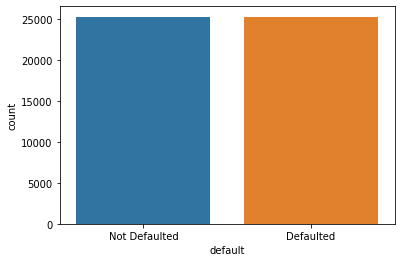

In [1434]:
#plotting balanced data using countplot
ax = sns.countplot('default', data = balanced_df)
ax.set_xticklabels(('Not Defaulted','Defaulted'),rotation=0)
plt.show()

In [1437]:
# independent variable (estimator)
X = balanced_df.drop("default", axis = 1)

# dependent variable (label)
y = balanced_df["default"]

In [1438]:
# Split your data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, stratify=y, random_state = 42)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [1524]:
def evaluation_metrics(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    # Predict classes for train and test data
    train_class_preds = model.predict(X_train)
    test_class_preds = model.predict(X_test)
    
    # Calculate the evaluation metrics
    train_accuracy = accuracy_score(y_train, train_class_preds)
    test_accuracy = accuracy_score(y_test, test_class_preds)
    train_precision = precision_score(y_train, train_class_preds)
    test_precision = precision_score(y_test, test_class_preds)
    train_recall = recall_score(y_train, train_class_preds)
    test_recall = recall_score(y_test, test_class_preds)
    train_f1 = f1_score(y_train, train_class_preds)
    test_f1 = f1_score(y_test, test_class_preds)
    train_roc_auc = roc_auc_score(y_train, train_class_preds)
    test_roc_auc = roc_auc_score(y_test, test_class_preds)
    
    # Store the evaluation metrics in a dictionary
    evaluation_metrics =OrderedDict([
    ('Train Accuracy: {:.2f}%'.format(train_accuracy*100), None),
    ('Test Accuracy: {:.2f}%'.format(test_accuracy*100), None),
    ('Train Precision: {:.2f}%'.format(train_precision*100), None),
    ('Test Precision: {:.2f}%'.format(test_precision*100), None),
    ('Train Recall: {:.2f}%'.format(train_recall*100), None),
    ('Test Recall: {:.2f}%'.format(test_recall*100), None),
    ('Train F1 Score: {:.2f}%'.format(train_f1*100), None),
    ('Test F1 Score: {:.2f}%'.format(test_f1*100), None),
    ('Train ROC-AUC: {:.2f}%'.format(train_roc_auc*100), None),
    ('Test ROC-AUC: {:.2f}%'.format(test_roc_auc*100), None)

])
    
    return evaluation_metrics

LR

In [1525]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Initialize the logistic regression model
logistic = LogisticRegression(random_state=42)

# Use GridSearchCV to perform the hyperparameter tuning
logistic_cv = GridSearchCV(logistic, param_grid, cv=5)

# Fit the GridSearchCV model to the data
logistic_cv.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", logistic_cv.best_params_)


Best hyperparameters: {'C': 10, 'penalty': 'l2'}


In [1530]:
#creating Instance of Logistic Regression
evaluation_metrics(logistic_cv, X_train, y_train, X_test, y_test)


OrderedDict([('Train Accuracy: 64.01%', None),
             ('Test Accuracy: 63.97%', None),
             ('Train Precision: 69.75%', None),
             ('Test Precision: 69.92%', None),
             ('Train Recall: 49.50%', None),
             ('Test Recall: 49.04%', None),
             ('Train F1 Score: 57.90%', None),
             ('Test F1 Score: 57.65%', None),
             ('Train ROC-AUC: 64.01%', None),
             ('Test ROC-AUC: 63.97%', None)])

In [1531]:
#     # Predict class probabilities for train and test data
# train_probs = logistic.predict_proba(X_train)[:, 1]
# test_probs = logistic.predict_proba(X_test)[:, 1]
    
    # Predict classes for train and test data
train_class_preds = logistic.predict(X_train)
test_class_preds = logistic.predict(X_test)

 The predict_proba method of this object is used to make predictions for new data

The predict_proba method returns an array of probabilities, one for each class, and the probabilities are stored in the train_preds and test_preds arrays.

In [1503]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, test_class_preds):
  # You can call this function by passing y_test and test_class_preds
  #  as arguments and it will plot the confusion matrix using seaborn heatmap.
    labels = ['Not Defaulter', 'Defaulter']
    cm = confusion_matrix(y_test, test_class_preds)
    print(cm)

    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    plt.show()

[[5989 1601]
 [3868 3722]]


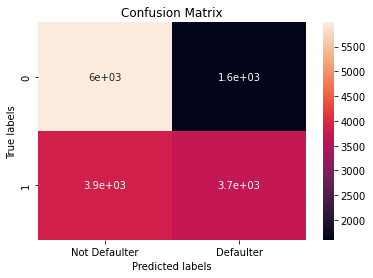

In [1504]:
plot_confusion_matrix(y_test,test_class_preds)

In [1505]:
# storing best params in variable
optimized_val = logistic_cv.best_estimator_

In [1506]:
def plot_feature_importance(optimized_val, X_train):
    # You can call this function by passing the optimized_val and X_train as 
    # arguments and it will plot the bar graph showing feature importances via coefficients.
    cols = X_train.columns
    feature_importance = pd.DataFrame({'Features': cols, 'Importance': np.abs(optimized_val.coef_).ravel()})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)[:10]

    plt.bar(height=feature_importance['Importance'], x=feature_importance['Features'])
    plt.xticks(rotation=90)
    plt.title("Feature importances via coefficients")
    plt.show()

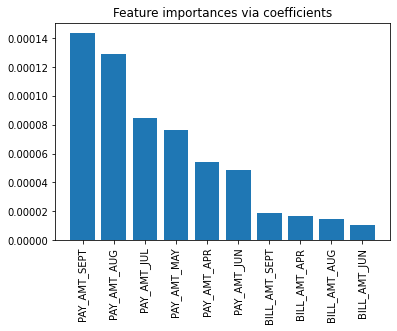

In [1507]:
plot_feature_importance(optimized_val,X_train)

RF

In [1448]:
from sklearn.model_selection import RandomizedSearchCV

In [1449]:
#creating Instance of Logistic Regression
rf_clf= RandomForestClassifier()

In [1543]:
evaluation_metrics(rf_clf, X_train, y_train, X_test, y_test)

OrderedDict([('Train Accuracy: 99.74%', None),
             ('Test Accuracy: 94.57%', None),
             ('Train Precision: 99.66%', None),
             ('Test Precision: 94.48%', None),
             ('Train Recall: 99.82%', None),
             ('Test Recall: 94.66%', None),
             ('Train F1 Score: 99.74%', None),
             ('Test F1 Score: 94.57%', None),
             ('Train ROC-AUC: 99.74%', None),
             ('Test ROC-AUC: 94.57%', None)])

In [1450]:
# Creating parameter grid  
param_grid = {
    'max_depth': [10,20,30],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [5, 8, 10],
    'n_estimators': [100, 150, 200]
}

In [1451]:
# Instantiate grid search model
random_search = RandomizedSearchCV(estimator = rf_clf,param_distributions= param_grid,  scoring = 'accuracy',  
                                   cv = 3, n_jobs = -1, verbose = 1)

In [1452]:
# Fit grid search to the data
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [5, 8, 10],
                                        'n_estimators': [100, 150, 200]},
                   scoring='accuracy', verbose=1)

In [1536]:
#get best parameters
random_search.best_params_

{'n_estimators': 150,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_depth': 30}

In [1537]:

#get best score
random_search.best_score_

0.9354884213275972

In [1539]:
evaluation_metrics(random_search, X_train, y_train, X_test, y_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


OrderedDict([('Train Accuracy: 96.98%', None),
             ('Test Accuracy: 94.29%', None),
             ('Train Precision: 96.28%', None),
             ('Test Precision: 93.01%', None),
             ('Train Recall: 97.75%', None),
             ('Test Recall: 95.77%', None),
             ('Train F1 Score: 97.01%', None),
             ('Test F1 Score: 94.37%', None),
             ('Train ROC-AUC: 96.98%', None),
             ('Test ROC-AUC: 94.29%', None)])

[[5989 1601]
 [3868 3722]]


[Text(0.5, 0, 'Not Defaulter'), Text(1.5, 0, 'Defaulter')]

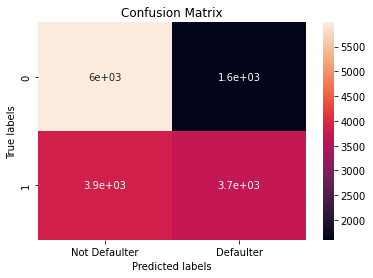

In [1540]:
#Plotting Confusion matrix
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)

In [1541]:
cols = X_train.columns
feature_importance = pd.DataFrame({'Features':cols, 'Importance':np.abs(optimized_val.coef_).ravel() })
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

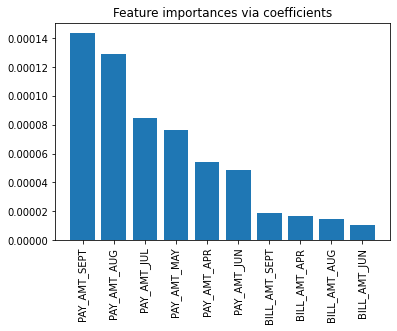

In [1542]:
#plotting feature importance
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.show()

XGBOOST

In [ ]:
# Fit grid search to the data
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [5, 8, 10],
                                        'n_estimators': [100, 150, 200]},
                   scoring='accuracy', verbose=1)

In [ ]:
#get best parameters
random_search.best_params_

{'n_estimators': 150,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_depth': 30}

In [ ]:

#get best score
random_search.best_score_

0.9354884213275972

In [ ]:
evaluation_metrics(random_search, X_train, y_train, X_test, y_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


OrderedDict([('Train Accuracy: 96.98%', None),
             ('Test Accuracy: 94.29%', None),
             ('Train Precision: 96.28%', None),
             ('Test Precision: 93.01%', None),
             ('Train Recall: 97.75%', None),
             ('Test Recall: 95.77%', None),
             ('Train F1 Score: 97.01%', None),
             ('Test F1 Score: 94.37%', None),
             ('Train ROC-AUC: 96.98%', None),
             ('Test ROC-AUC: 94.29%', None)])

In [1548]:
#creating Instance of Logistic Regression
XG= XGBClassifier(random_state=123)

evaluation_metrics(XG, X_train, y_train, X_test, y_test)

OrderedDict([('Train Accuracy: 93.74%', None),
             ('Test Accuracy: 93.70%', None),
             ('Train Precision: 92.38%', None),
             ('Test Precision: 92.56%', None),
             ('Train Recall: 95.34%', None),
             ('Test Recall: 95.05%', None),
             ('Train F1 Score: 93.83%', None),
             ('Test F1 Score: 93.79%', None),
             ('Train ROC-AUC: 93.74%', None),
             ('Test ROC-AUC: 93.70%', None)])

In [1549]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [1550]:
# Instantiate grid search model
XGboost = RandomizedSearchCV(estimator = XG,param_distributions= param_dict,  scoring = 'accuracy',  
                                   cv = 3, n_jobs = -1, verbose = 1)

In [1553]:
#creating Instance of Logistic Regression
evaluation_metrics(XGboost, X_train, y_train, X_test, y_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


OrderedDict([('Train Accuracy: 98.28%', None),
             ('Test Accuracy: 94.23%', None),
             ('Train Precision: 97.83%', None),
             ('Test Precision: 94.12%', None),
             ('Train Recall: 98.74%', None),
             ('Test Recall: 94.35%', None),
             ('Train F1 Score: 98.29%', None),
             ('Test F1 Score: 94.24%', None),
             ('Train ROC-AUC: 98.28%', None),
             ('Test ROC-AUC: 94.23%', None)])

In [1561]:
# features = list(i for i in list(balanced_df.describe(include='all').columns) if i != 'default')

In [1562]:
# feature_importances_rfc = XGboost.feature_importances_
# feature_importances_rfc_df = pd.Series(feature_importances_rfc, index=features)

AttributeError: ignored

In [1559]:
cols = X_train.columns
feature_importance = pd.DataFrame({'Features':cols, 'Importance':np.abs(optimized_val.coef_).ravel() })
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

In [1560]:
# Getting the Feature importance 
# Feature Importance
feature_importances_xgb = pd.DataFrame(XGboost.feature_importances,
                                   index = cols,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(12,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="blue",  align="center")
plt.xticks(feature_importances_xgb.index, rotation = 90)
plt.show()

AttributeError: ignored

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# # Create the hyperparameter grid
# param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# # Initialize the logistic regression model
# logistic = LogisticRegression(random_state=42)

# # Use GridSearchCV to perform the hyperparameter tuning
# logistic_cv = GridSearchCV(logistic, param_grid, cv=5)

# # Fit the GridSearchCV model to the data
# logistic_cv.fit(X_train, y_train)

# # Print the best hyperparameters
# print("Best hyperparameters:", logistic_cv.best_params_)

# # storing best params in variable
# optimized_val = logistic_cv.best_estimator_

 The grid contains two hyperparameters: C and penalty. The hyperparameters control the behavior of the logistic regression model during the training process.

C is the inverse of regularization ,It determines the trade-off between achieving a low training error and a low testing error. A smaller C value applies more regularization and a larger C value applies less regularization.

penalty determines the type of regularization to be applied. There are two options: l1 and l2. l1 is the L1 regularization, which adds an absolute value penalty term to the loss function. l2 is the L2 regularization, which adds a squared penalty term to the loss function.

 The model will be trained multiple times using different combinations of C and penalty values, and the best combination will be selected based on the performance on the validation set.

the GridSearchCV class to find the best hyperparameters for the logistic regression model by trying different combinations of hyperparameters and evaluating the performance of each combination using cross-validation with 5 folds.

best_params_: the code outputs the best combination of hyperparameters for the logistic regression model, which was found through hyperparameter tuning using the GridSearchCV class.

In [ ]:
# # Predicted Probability
# train_preds = optimized_val.predict_proba(X_train)[:,1]
# test_preds = optimized_val.predict_proba(X_test)[:,1]

In [ ]:
# # Get the predicted classes
# train_class_preds = optimized_val.predict(X_train)
# test_class_preds = optimized_val.predict(X_test)

In [ ]:
# from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,accuracy_score

# # Get the accuracy scores
# train_accuracy_lr = accuracy_score(train_class_preds,y_train)
# test_accuracy_lr = accuracy_score(test_class_preds,y_test)

# print("The accuracy on train data is ", train_accuracy_lr)
# print("The accuracy on test data is ", test_accuracy_lr)
# #get scores of various metrics
# test_precision_score_lr = precision_score(test_class_preds,y_test) 
# test_recall_score_lr = recall_score(test_class_preds,y_test)
# test_f1_score_lr = f1_score(test_class_preds,y_test)
# test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

# print("The precision on test data is ", test_precision_score_lr)
# print("The recall on test data is ", test_recall_score_lr)
# print("The f1 on test data is ", test_f1_score_lr)
# print("The roc_score on test data is ", test_roc_score_lr)

In [ ]:
# import numpy as np
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# def evaluate_model(model, X_train, X_test, y_train, y_test):
#     # Get predictions for train and test data
#     train_class_preds = model.predict(X_train)
#     test_class_preds = model.predict(X_test)
    
#     # Accuracy
#     train_acc = accuracy_score(train_class_preds, y_train)
#     test_acc = accuracy_score(test_class_preds, y_test)
    
#     # Precision
#     test_precision = precision_score(test_class_preds, y_test)
    
#     # Recall
#     test_recall = recall_score(test_class_preds, y_test)
    
#     # F1 Score
#     test_f1 = f1_score(test_class_preds, y_test)
    
#     # # ROC-AUC Score
#     test_roc_auc =roc_auc_score(test_class_preds,y_test)

        
#     print("Train Accuracy: {:.2f}%".format(train_acc * 100))
#     print("Test Accuracy: {:.2f}%".format(test_acc * 100))
#     print("Test Precision: {:.2f}%".format(test_precision * 100))
#     print("Test Recall: {:.2f}%".format(test_recall * 100))
#     print("Test F1 Score: {:.2f}".format(test_f1))
#     print("Test ROC-AUC: {:.2f}".format(test_roc_auc))


In [ ]:
# from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,accuracy_score

# # Get the accuracy scores
# train_accuracy_lr = accuracy_score(train_class_preds,y_train)
# test_accuracy_lr = accuracy_score(test_class_preds,y_test)

# print("The accuracy on train data is ", train_accuracy_lr)
# print("The accuracy on test data is ", test_accuracy_lr)
# #get scores of various metrics
# test_precision_score_lr = precision_score(test_class_preds,y_test) 
# test_recall_score_lr = recall_score(test_class_preds,y_test)
# test_f1_score_lr = f1_score(test_class_preds,y_test)
# test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

# print("The precision on test data is ", test_precision_score_lr)
# print("The recall on test data is ", test_recall_score_lr)
# print("The f1 on test data is ", test_f1_score_lr)
# print("The roc_score on test data is ", test_roc_score_lr)

In [ ]:
# Getting the confusion matrix 

# from sklearn.metrics import confusion_matrix
# labels = ['Not Defaulter', 'Defaulter']
# cm = confusion_matrix(y_test, test_class_preds)
# print(cm)

# ax= plt.subplot()
# sns.heatmap(cm, annot=True, ax = ax)

# # labels, title and ticks
# ax.set_xlabel('Predicted labels')
# ax.set_ylabel('True labels')
# ax.set_title('Confusion Matrix')
# ax.xaxis.set_ticklabels(labels)




In [ ]:
cols = X_train.columns
feature_importance = pd.DataFrame({'Features':cols, 'Importance':np.abs(optimized_val.coef_).ravel() })
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

In [ ]:
#plotting feature importance
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()
#Fitting the model
rf_clf.fit(X_train,y_train)

In [ ]:

# Getting the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [ ]:
from collections import OrderedDict

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def calculate_evaluation_metrics(model, X_train, X_test, y_train, y_test):
    # Predict class probabilities for train and test data
    train_probs = model.predict_proba(X_train)[:, 1]
    test_probs = model.predict_proba(X_test)[:, 1]
    
    # Predict classes for train and test data
    train_class_preds = model.predict(X_train)
    test_class_preds = model.predict(X_test)
    
    # Calculate the evaluation metrics
    train_accuracy = accuracy_score(y_train, train_class_preds)
    test_accuracy = accuracy_score(y_test, test_class_preds)
    train_precision = precision_score(y_train, train_class_preds)
    test_precision = precision_score(y_test, test_class_preds)
    train_recall = recall_score(y_train, train_class_preds)
    test_recall = recall_score(y_test, test_class_preds)
    train_f1 = f1_score(y_train, train_class_preds)
    test_f1 = f1_score(y_test, test_class_preds)
    train_roc_auc = roc_auc_score(y_train, train_probs)
    test_roc_auc = roc_auc_score(y_test, test_probs)
    
    # Store the evaluation metrics in a dictionary
    evaluation_metrics =OrderedDict([
    ('Train Accuracy: {:.2f}%'.format(train_accuracy*100), None),
    ('Test Accuracy: {:.2f}%'.format(test_accuracy*100), None),
    ('Train Precision: {:.2f}%'.format(train_precision*100), None),
    ('Test Precision: {:.2f}%'.format(test_precision*100), None),
    ('Train Recall: {:.2f}%'.format(train_recall*100), None),
    ('Test Recall: {:.2f}%'.format(test_recall*100), None),
    ('Train F1 Score: {:.2f}%'.format(train_f1*100), None),
    ('Test F1 Score: {:.2f}%'.format(test_f1*100), None),
    ('Train ROC-AUC: {:.2f}%'.format(train_roc_auc*100), None),
    ('Test ROC-AUC: {:.2f}%'.format(test_roc_auc*100), None)

#     evaluation_metrics = OrderedDict([
# ('Train Accuracy: {:.2f}%'.format(train_accuracy*100))
# # ('Test Accuracy: {:.2f}%'.format(test_accuracy100)),
# # ('Train Precision: {:.2f}%'.format(train_precision100)),
# # ('Test Precision: {:.2f}%'.format(test_precision100)),
# # ('Train Recall: {:.2f}%'.format(train_recall100)),
# # ('Test Recall: {:.2f}%'.format(test_recall100)),
# # ('Train F1 Score: {:.2f}%'.format(train_f1100)),
# # ('Test F1 Score: {:.2f}%'.format(test_f1100)),
# # ('Train ROC-AUC: {:.2f}%'.format(train_roc_auc100)),
# # ('Test ROC-AUC: {:.2f}%'.format(test_roc_auc100))
# ])
])
    
    return evaluation_metrics


In [ ]:
calculate_evaluation_metrics(rf_clf, X_train, X_test, y_train, y_test)

In [ ]:
# evaluate_model(rf_clf, X_train, X_test, y_train, y_test)

In [ ]:
# # Get the accuracy scores
# train_accuracy_rf = accuracy_score(train_class_preds,y_train)
# test_accuracy_rf = accuracy_score(test_class_preds,y_test)

# print("The accuracy on train data is ", train_accuracy_rf)
# print("The accuracy on test data is ", test_accuracy_rf)
# # Get scores of various metrics
# test_precision_score_rf = precision_score(test_class_preds,y_test)
# test_recall_score_rf = recall_score(test_class_preds,y_test)
# test_f1_score_rf = f1_score(test_class_preds,y_test)
# test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

# print("The precision on test data is ", test_precision_score_rf)
# print("The recall on test data is ", test_recall_score_rf)
# print("The f1 on test data is ", test_f1_score_rf)
# print("The roc_score on test data is ", test_roc_score_rf)

In [ ]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [ ]:
evaluate_model(rf_clf, X_train, X_test, y_train, y_test)

In [ ]:
# # Get the accuracy scores
# train_accuracy_rf = accuracy_score(train_class_preds,y_train)
# test_accuracy_rf = accuracy_score(test_class_preds,y_test)

# print("The accuracy on train data is ", train_accuracy_rf)
# print("The accuracy on test data is ", test_accuracy_rf)

# # Get scores of various metrics
# test_precision_score_rf = precision_score(test_class_preds,y_test)
# test_recall_score_rf = recall_score(test_class_preds,y_test)
# test_f1_score_rf = f1_score(test_class_preds,y_test)
# test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

# print("The precision on test data is ", test_precision_score_rf)
# print("The recall on test data is ", test_recall_score_rf)
# print("The f1 on test data is ", test_f1_score_rf)
# print("The roc_score on test data is ", test_roc_score_rf)

In [ ]:
#Plotting Confusion matrix
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
# Fitting the data
xgb = XGBClassifier(random_state=123,max_depth=8)
xgb.fit(X_train, y_train)

In [ ]:
evaluate_model(xgb, X_train, X_test, y_train, y_test)

In [ ]:
#Print model report:
y_pred_xgb = xgb.predict(X_test)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
print("Precision: {:.2f}%".format(xgb_precision))
print("Recall: {:.2f}%".format(xgb_recall))


pred_train_xgb = xgb.predict(X_train)
train_acc_xgb = accuracy_score(y_train, pred_train_xgb)
print("Train Accuracy: {:.2f}%".format(train_acc_xgb * 100))
    
pred_test_xgb = xgb.predict(X_test)
test_acc_xgb = accuracy_score(y_test, pred_test_xgb)
print("Test Accuracy: {:.2f}%".format(test_acc_xgb * 100))


train_pred_proba = xgb.predict_proba(X_train)[:,1]
xgb_auc_train = roc_auc_score(y_train, train_pred_proba)
print("Train AUC:" , xgb_auc_train )

test_pred_proba = xgb.predict_proba(X_test)[:,1]
xgb_auc_test = roc_auc_score(y_test, test_pred_proba)
print("Test AUC:" , xgb_auc_test )

In [ ]:
# Getting the Feature importance 
# Feature Importance
feature_importances_xgb = pd.DataFrame(xgb.feature_importances_,
                                   index = cols,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(12,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="blue",  align="center")
plt.xticks(feature_importances_xgb.index, rotation = 90)
plt.show()

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***